In [50]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import numpy as np

# set up initial path to data
DATADIR = 'F:/Last-Row/sample-data-master/data/'
game_id = 1 # let's look at sample match 2

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [51]:
# read in tracking data
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [52]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,0.35529,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,0.35554,...,0.55236,0.43313,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
5,1,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,0.35528,...,0.55202,0.43311,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,0.90614,0.45355,NaN,NaN,0.34157,0.64598,0.31228,0.67513,...,NaN,NaN,0.30044,0.68311,0.33644,0.65390,0.34157,0.64598,NaN,NaN
145003,2,5800.12,0.90550,0.45355,NaN,NaN,0.34127,0.64583,0.31230,0.67529,...,NaN,NaN,0.30044,0.68311,0.33656,0.65398,0.34127,0.64583,NaN,NaN
145004,2,5800.16,0.90492,0.45355,NaN,NaN,0.34089,0.64569,0.31214,0.67501,...,NaN,NaN,0.30044,0.68311,0.33637,0.65366,0.34089,0.64569,NaN,NaN


In [53]:
# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

In [54]:
# Create files that resemble this...

tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-52.91308,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-4.79968,7.67788
2,1,0.08,-52.89824,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,-0.37630,6.35392
3,1,0.12,-52.87916,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,5.55758,4.57708,NaN,NaN,NaN,NaN,NaN,NaN,3.93896,5.06192
4,1,0.16,-52.87174,1.19816,-18.42068,-10.41556,-17.29178,0.68816,-20.19936,9.82328,...,5.55016,4.54716,NaN,NaN,NaN,NaN,NaN,NaN,5.66676,5.28292
5,1,0.20,-52.86326,1.19816,-18.44718,-10.38292,-17.31616,0.66776,-20.19512,9.84096,...,5.51412,4.54852,NaN,NaN,NaN,NaN,NaN,NaN,5.84272,6.41240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,43.05084,3.15860,NaN,NaN,-16.79358,-9.92664,-19.89832,-11.90884,...,NaN,NaN,-21.15336,-12.45148,-17.33736,-10.46520,-16.79358,-9.92664,NaN,NaN
145003,2,5800.12,42.98300,3.15860,NaN,NaN,-16.82538,-9.91644,-19.89620,-11.91972,...,NaN,NaN,-21.15336,-12.45148,-17.32464,-10.47064,-16.82538,-9.91644,NaN,NaN
145004,2,5800.16,42.92152,3.15860,NaN,NaN,-16.86566,-9.90692,-19.91316,-11.90068,...,NaN,NaN,-21.15336,-12.45148,-17.34478,-10.44888,-16.86566,-9.90692,NaN,NaN


In [55]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,-5.30,7.48,5.30,4.76
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,5.30,4.76,8.48,19.72
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,5.30,21.08,-5.30,12.92
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,-5.30,12.24,-1.06,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,10.60,11.56,-32.86,-30.60
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,-43.46,-25.84,-38.16,-12.92
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,-39.22,-12.92,-45.58,-7.48
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,-47.70,-8.16,NaN,NaN


In [29]:
# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home,tracking_away,events = mio.to_single_playing_direction(tracking_home,tracking_away,events)

In [32]:
tracking_home.tail()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
145002,2,5800.08,-43.05084,-3.15860,NaN,NaN,16.79358,9.92664,19.89832,11.90884,...,NaN,NaN,21.15336,12.45148,17.33736,10.46520,16.79358,9.92664,NaN,NaN
145003,2,5800.12,-42.98300,-3.15860,NaN,NaN,16.82538,9.91644,19.89620,11.91972,...,NaN,NaN,21.15336,12.45148,17.32464,10.47064,16.82538,9.91644,NaN,NaN
145004,2,5800.16,-42.92152,-3.15860,NaN,NaN,16.86566,9.90692,19.91316,11.90068,...,NaN,NaN,21.15336,12.45148,17.34478,10.44888,16.86566,9.90692,NaN,NaN
145005,2,5800.20,-42.88336,-3.15792,NaN,NaN,16.90064,9.89536,19.95874,11.87824,...,NaN,NaN,21.15336,12.45148,17.36810,10.41556,16.90064,9.89536,NaN,NaN
145006,2,5800.24,-42.88336,-3.15792,NaN,NaN,16.96424,9.88992,20.01068,11.92176,...,NaN,NaN,21.15336,12.45148,17.42322,10.31288,16.96424,9.88992,NaN,NaN


In [56]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')

In [57]:
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-52.91308,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,-52.89824,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,0.000000,0.0000,0.000,0.000000,0.0000,0.000,0.000000,0.000,0.000,0.000000
3,1,0.12,-52.87916,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,0.000000,0.0000,0.000,0.000000,0.0000,0.000,0.000000,0.000,0.000,0.000000
4,1,0.16,-52.87174,1.19816,-18.42068,-10.41556,-17.29178,0.68816,-20.19936,9.82328,...,2.078228,0.2385,-0.272,0.361754,-0.2385,2.057,2.070780,0.901,-0.510,1.035327
5,1,0.20,-52.86326,1.19816,-18.44718,-10.38292,-17.31616,0.66776,-20.19512,9.84096,...,0.598776,0.1855,2.363,2.370270,-0.0795,1.751,1.752804,0.159,0.323,0.360014


In [59]:
""" **** pitch control for passes leading up to goal 2 **** """

# get all shots and goals in the match
shots = events[events['Type']=='SHOT']
goals = shots[shots['Subtype'].str.contains('-GOAL')].copy()

In [73]:
tracking_home.iloc[820]

Period           1.000000
Time [s]        32.840000
Home_11_x      -39.646120
Home_11_y        1.700680
Home_1_x       -16.843400
                  ...    
Home_8_vy       -0.561000
Home_8_speed     2.398530
Home_9_vx       -1.616500
Home_9_vy       -0.680000
Home_9_speed     1.753702
Name: 821, Length: 74, dtype: float64

      Team  Type              Subtype  Period  Start Frame  Start Time [s]  \
34    Home  SHOT  HEAD-ON TARGET-GOAL       1         2289           91.56   
1114  Home  SHOT       ON TARGET-GOAL       2        90005         3600.20   
1213  Home  SHOT       ON TARGET-GOAL       2        99032         3961.28   

      End Frame  End Time [s]      From   To  Start X  Start Y  End X  End Y  
34         2309         92.36   Player9  NaN    44.52     2.04  54.06  -3.40  
1114      90026       3601.04  Player10  NaN   -44.52    12.92 -53.00  -2.72  
1213      99046       3961.84   Player9  NaN   -50.88    -2.72 -54.06  -0.68  


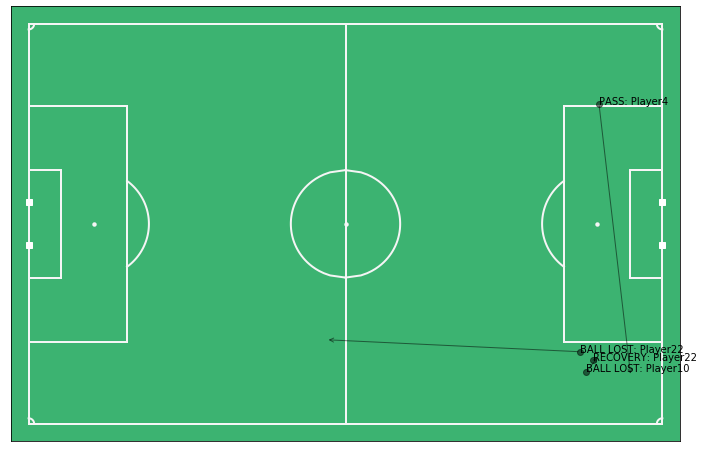

In [79]:


print(goals)

# plot the 3 events leading up to the second goal
mviz.plot_events( events.loc[820:823], color='k', indicators = ['Marker','Arrow'], annotate=True )

# first get model parameters
params = mpc.default_model_params(3)

# evaluated pitch control surface for first pass
PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(820, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23a105d5d30>)

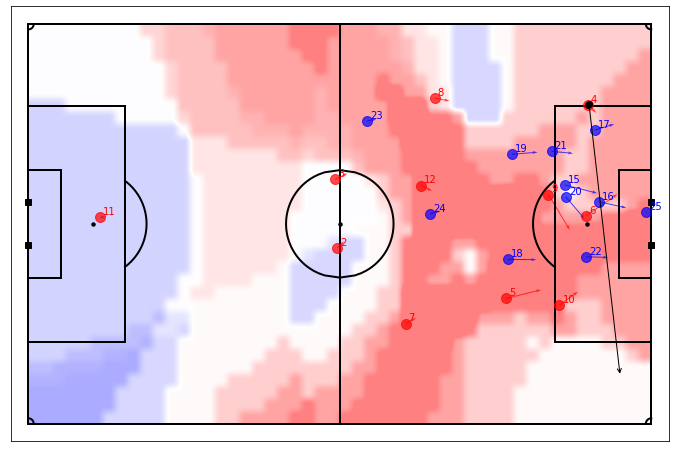

In [78]:
mviz.plot_pitchcontrol_for_event( 820, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )

In [16]:
%matplotlib inline

In [19]:
PPCF.shape

(32, 50)

In [20]:
%time 2**128

Wall time: 0 ns


340282366920938463463374607431768211456

In [21]:
%time PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(821, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)

Wall time: 963 ms


In [23]:
mpc.generate_pitch_control_for_event(824, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)

(array([[0.49526207, 0.49526207, 0.49526207, ..., 0.688     , 0.86      ,
         0.86      ],
        [0.49526207, 0.49526207, 0.49526207, ..., 0.86      , 0.86      ,
         0.86      ],
        [0.33125939, 0.49526207, 0.49526207, ..., 0.86      , 0.86      ,
         0.86      ],
        ...,
        [0.24763104, 0.24763104, 0.24763104, ..., 0.344     , 0.344     ,
         0.344     ],
        [0.24763104, 0.24763104, 0.24763104, ..., 0.344     , 0.344     ,
         0.344     ],
        [0.24763104, 0.24763104, 0.3989024 , ..., 0.344     , 0.344     ,
         0.344     ]]),
 array([-53.        , -50.83673469, -48.67346939, -46.51020408,
        -44.34693878, -42.18367347, -40.02040816, -37.85714286,
        -35.69387755, -33.53061224, -31.36734694, -29.20408163,
        -27.04081633, -24.87755102, -22.71428571, -20.55102041,
        -18.3877551 , -16.2244898 , -14.06122449, -11.89795918,
         -9.73469388,  -7.57142857,  -5.40816327,  -3.24489796,
         -1.08163265,   1